#####   
<span style="font-family:Arial; font-weight:Bold; font-size:2.5em; color:#00b3e5;"> LSTM - Stock Market Prediction

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models     import Sequential
from keras.layers     import LSTM, Dropout, Dense, Activation, SimpleRNN, TimeDistributed
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [2]:
Project_Name = 'Google_Stock_Price'
cycle_n      =  20

In [3]:
timeseries = pd.read_csv('Google_Stock_Price_Train.csv')
train      = pd.read_csv('Google_Stock_Price_Train.csv')
test       = pd.read_csv('Google_Stock_Price_Test.csv')        
print( timeseries.shape, test.shape )
timeseries.head(3)

(1258, 6) (20, 6)


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"


In [4]:
timeseries = timeseries['Open']
train      = train['Open']
test       = test['Open']
timeseries

0       325.25
1       331.27
2       329.83
3       328.34
4       322.04
         ...  
1253    790.90
1254    790.68
1255    793.70
1256    783.33
1257    782.75
Name: Open, Length: 1258, dtype: float64

In [5]:
timeseries.reset_index( drop=True, inplace=True )
train.reset_index(      drop=True, inplace=True )
test.reset_index(       drop=True, inplace=True )

timeseries = pd.DataFrame( timeseries ) 
train      = pd.DataFrame( train      ) 
test       = pd.DataFrame( test       ) 

timeseries.head(3)

,Open
0,325.25
1,331.27
2,329.83


In [6]:
scaler = MinMaxScaler()
scaler.fit( timeseries )

timeseries = scaler.transform( timeseries )

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [7]:
help( TimeseriesGenerator )

Help on class TimeseriesGenerator in module keras.preprocessing.sequence:

class TimeseriesGenerator(keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  Deprecated: `tf.keras.preprocessing.sequence.TimeseriesGenerator` does not
 |  operate on tensors and is not recommended for new code. Prefer using a
 |  `tf.data.Dataset` which provides a more efficient and flexible mechanism for
 |  batching, shuffling, and windowing input. See the
 |  [tf.data guide](https://www.tensorflow.org/guide/data) for more details.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  
 |  Arguments:
 |      data: Indexable generator (such as li

In [8]:
print( train.shape, test.shape )

(1258, 1) (20, 1)


In [9]:
length     = 20
batch_size = 256
generator  = TimeseriesGenerator( timeseries, timeseries, length=length, batch_size=batch_size )
generator

In [10]:
n_features = 1
model = Sequential()
model.add( SimpleRNN(500,activation='relu',input_shape=(length,n_features)) )
model.add( Dropout(rate=0.20) )
model.add( Dense(200,activation='relu') )
model.add( Dropout(rate=0.05) )
model.add( Dense(200,activation='relu') )
model.add( Dense(200) )
model.add( Dense(1)  )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 500)               251000    
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense (Dense)               (None, 200)               100200    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 dense_3 (Dense)             (None, 1)                 2

In [11]:
model.compile( optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae','accuracy'] )

In [12]:
model.fit( generator, epochs=5, shuffle=False )

Epoch 1/5
5/5 [==============================] - 3s 289ms/step - loss: 0.0187 - mae: 0.1126 - accuracy: 0.0016
Epoch 2/5
5/5 [==============================] - 2s 308ms/step - loss: 0.0119 - mae: 0.0948 - accuracy: 0.0016
Epoch 3/5
5/5 [==============================] - 2s 329ms/step - loss: 0.0188 - mae: 0.1248 - accuracy: 0.0016
Epoch 4/5
5/5 [==============================] - 2s 298ms/step - loss: 0.0078 - mae: 0.0740 - accuracy: 0.0016
Epoch 5/5
5/5 [==============================] - 2s 330ms/step - loss: 0.0137 - mae: 0.0989 - accuracy: 0.0016


<Axes: >

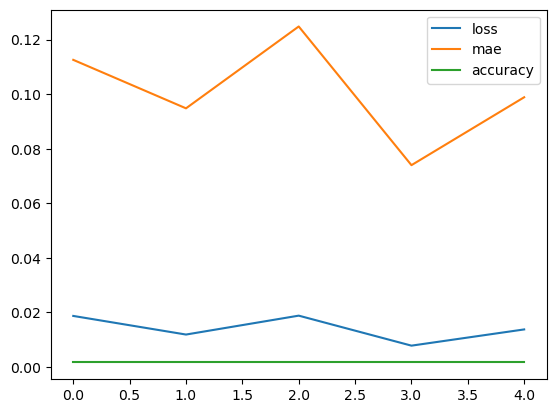

In [13]:
losses = pd.DataFrame( model.history.history )
losses.plot()

## Eval Test

In [14]:
# picking last values in  timeseries
first_eval_batch = timeseries[-length:]
first_eval_batch

array([[0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.95762334],
       [0.96413424],
       [0.96402262],
       [0.96971501],
       [0.95077759],
       [0.96294367],
       [0.96123223],
       [0.95475854],
       [0.95204256],
       [0.95163331],
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [15]:
first_eval_batch = first_eval_batch.reshape((1,length,1))
first_eval_batch

array([[[0.86589404],
        [0.89030062],
        [0.90335962],
        [0.89642086],
        [0.91777662],
        [0.93176576],
        [0.94114145],
        [0.95762334],
        [0.96413424],
        [0.96402262],
        [0.96971501],
        [0.95077759],
        [0.96294367],
        [0.96123223],
        [0.95475854],
        [0.95204256],
        [0.95163331],
        [0.95725128],
        [0.93796041],
        [0.93688146]]])

In [16]:
model.predict(first_eval_batch)  # first prediction is the first value of test

1/1 [==============================] - 0s 229ms/step


array([[0.75716144]], dtype=float32)

In [17]:
test_predictions = []

first_eval_batch = timeseries[-length:]
current_batch    = first_eval_batch.reshape((1,length,n_features))
current_batch

array([[[0.86589404],
        [0.89030062],
        [0.90335962],
        [0.89642086],
        [0.91777662],
        [0.93176576],
        [0.94114145],
        [0.95762334],
        [0.96413424],
        [0.96402262],
        [0.96971501],
        [0.95077759],
        [0.96294367],
        [0.96123223],
        [0.95475854],
        [0.95204256],
        [0.95163331],
        [0.95725128],
        [0.93796041],
        [0.93688146]]])

In [18]:
for i in range( len(test) ):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

test_predictions

1/1 [==============================] - 0s 25ms/step


[array([0.75716144], dtype=float32),
 array([0.65695995], dtype=float32),
 array([0.54380614], dtype=float32),
 array([0.4351144], dtype=float32),
 array([0.33963433], dtype=float32),
 array([0.2599602], dtype=float32),
 array([0.19537677], dtype=float32),
 array([0.14632273], dtype=float32),
 array([0.11257652], dtype=float32),
 array([0.09050924], dtype=float32),
 array([0.07839118], dtype=float32),
 array([0.07298217], dtype=float32),
 array([0.07080079], dtype=float32),
 array([0.06981871], dtype=float32),
 array([0.06933939], dtype=float32),
 array([0.06910591], dtype=float32),
 array([0.069038], dtype=float32),
 array([0.06902558], dtype=float32),
 array([0.06902946], dtype=float32),
 array([0.06904323], dtype=float32)]

In [19]:
true_predictions = scaler.inverse_transform( test_predictions )
true_predictions

array([[686.13970286],
       [632.27539122],
       [571.44842628],
       [513.02010412],
       [461.69382994],
       [418.86420746],
       [384.14673579],
       [357.77724524],
       [339.63663513],
       [327.77414883],
       [321.25996242],
       [318.35229514],
       [317.17967197],
       [316.65174724],
       [316.39408094],
       [316.26857205],
       [316.23206926],
       [316.2253927 ],
       [316.22747537],
       [316.23488086]])

In [20]:
test['Pred'] = true_predictions
test

,Open,Pred
0,778.81,686.139703
1,788.36,632.275391
2,786.08,571.448426
3,795.26,513.020104
4,806.40,461.693830
5,807.86,418.864207
6,805.00,384.146736
7,807.14,357.777245
8,807.48,339.636635
9,807.08,327.774149


<Axes: >

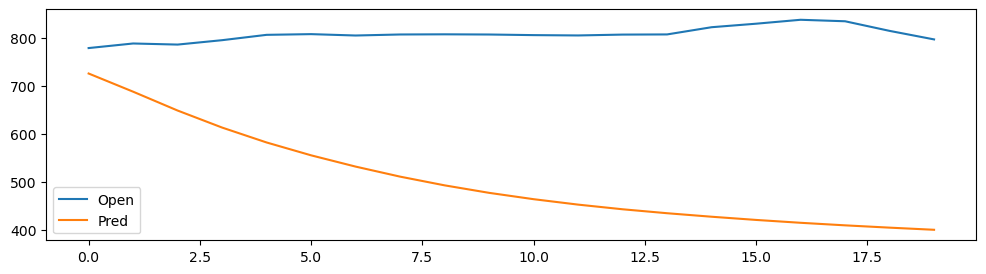

In [339]:
test.plot(figsize=(12,3))

In [178]:
model = Sequential()

model.add( LSTM(units=64, return_sequences=True, input_shape=(length,n_features)) )
model.add( Dropout(0.15) )
#model.add(Activation('tanh'))

model.add( LSTM(units=64, return_sequences=True ) ) 
#model.add(Activation('tanh'))
model.add( LSTM(units=64, return_sequences=True ) ) 
#model.add(Activation('tanh'))
model.add( Dropout(0.15) )
model.add( LSTM(units=64, return_sequences=True ) ) 
#model.add(Activation('tanh'))
model.add( LSTM(units=64, return_sequences=True ) ) 
#model.add(Activation('tanh'))
model.add( LSTM(units=64, return_sequences=True ) ) 
#model.add(Activation('tanh'))
model.add( LSTM(units=64, return_sequences=True ) ) 
#model.add(Activation('tanh'))
model.add( LSTM(units=64, return_sequences=True ) ) 
#model.add(Activation('tanh'))
model.add( LSTM(units=64, return_sequences=True ) ) 
#model.add(Activation('tanh'))
model.add( LSTM(units=64, return_sequences=True ) ) 
#model.add(Activation('tanh'))

model.add( LSTM(units=64 ) ) 
#model.add(Activation('tanh'))

model.add( Dense(units=1) )
          
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 20, 64)            16896     
                                                                 
 dropout_16 (Dropout)        (None, 20, 64)            0         
                                                                 
 lstm_19 (LSTM)              (None, 20, 64)            33024     
                                                                 
 lstm_20 (LSTM)              (None, 20, 64)            33024     
                                                                 
 dropout_17 (Dropout)        (None, 20, 64)            0         
                                                                 
 lstm_21 (LSTM)              (None, 20, 64)            33024     
                                                                 
 lstm_22 (LSTM)              (None, 20, 64)           

In [192]:
model = Sequential() 
model.add( LSTM( units=20, return_sequences=True, activation='tanh', input_shape=(length,n_features)))
model.add( Dropout(0.15) )
model.add( LSTM( units=20,  return_sequences=True, activation='tanh'  ))
model.add( LSTM( units=20,  return_sequences=True, activation='tanh'  ))
model.add( Dropout(0.15) )
model.add( TimeDistributed( Dense(20, activation='relu') ))
model.add( TimeDistributed( Dense(1) ))

In [ ]:
model = Sequential()
model.add(LSTM(units=200, return_sequences=True, input_shape=(length, n_features), activation='relu' ))
model.add(Dropout(0.15))
model.add(LSTM(units=200, return_sequences=True, activation='tanh' ))
model.add(Dropout(0.15))
model.add(LSTM(units=20, activation='relu', return_sequences=True))
model.add(Dropout(0.15))
model.add(LSTM(units=20, activation='relu', return_sequences=True))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(1))

#model.compile(loss=keras.losses.MeanSquaredError(), optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['mse'])

